# Sampling From Probability Distributions In Python

This notebook demonstrates 3 tools available for generating random samples from probability distributions:

### `random`

The [random][random] module is part of the *Python Standard Library*, and so is readily available.

Its functions return a single value. Thus, if you wish to create a sample of desired size $n$, you'll need a loop, as in a *list comprehension*.

[random]: https://docs.python.org/3/library/random.html#real-valued-distributions


### `numpy.random`

[NumPy][numpy] is a third-party package, and has to be [installed][np-install]. It provides data structures that allow fast operations ([learn more][np-intro]).

The [`numpy.random`][np-random] sub-module can be used to generate samples from various probability distributions.

[numpy]: https://numpy.org/
[np-install]: https://numpy.org/install/
[np-intro]: https://numpy.org/doc/stable/user/whatisnumpy.html
[np-random]: https://numpy.org/doc/stable/reference/random/index.html


### `scipy.stats`

[SciPy][scipy] is also a third-party package that has to be [installed][sp-install]. It is closely knit with *NumPy*.

The [`scipy.stats`][sp-stats] sub-module can be used to generate samples from probability distributions.

[scipy]: https://scipy.org/
[sp-install]: https://scipy.org/install/
[sp-stats]: https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import numpy as np
import pandas as pd
import random
import scipy
import seaborn as sns


sns.set_theme(font="serif", style="white", rc={"figure.figsize": (10, 6)})

In [2]:
SAMPLE_SIZE = 5000
SEED = 12345

# For reproducability
random.seed(SEED)
numpy_gen = np.random.default_rng(SEED)


def plot_samples(distribution: str, **samples) -> None:
    """Get a layered kde-plot of the various `samples`.
    
    Args:
        distribution (str): The probability distribution sampled from.
        **samples: `dict` of samples to plot.
    """
    df = pd.DataFrame(samples)
    ax = sns.kdeplot(data=df, palette="tab10")
    ax.set_title(
        f"{distribution.title()} Distribution Sample",
        pad=16,
        size=16,
        weight=600,
    )
    sns.despine()

# 1. Normal Distribution

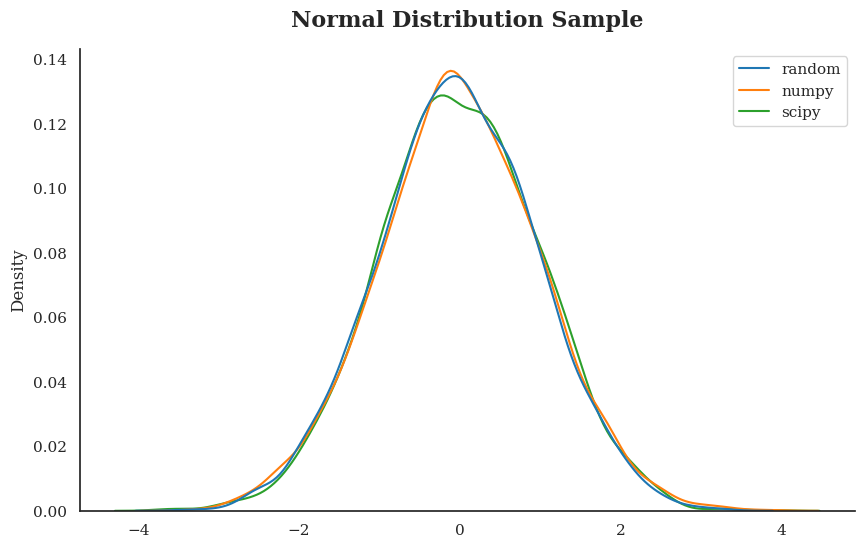

In [3]:
random_normal = [random.gauss(mu=0, sigma=1) for _ in range(SAMPLE_SIZE)]
numpy_normal = numpy_gen.normal(loc=0, scale=1, size=SAMPLE_SIZE)
scipy_normal = scipy.stats.norm.rvs(loc=0, scale=1, size=SAMPLE_SIZE, random_state=SEED)
plot_samples("Normal", random=random_normal, numpy=numpy_normal, scipy=scipy_normal)

# 2. Uniform Distribution

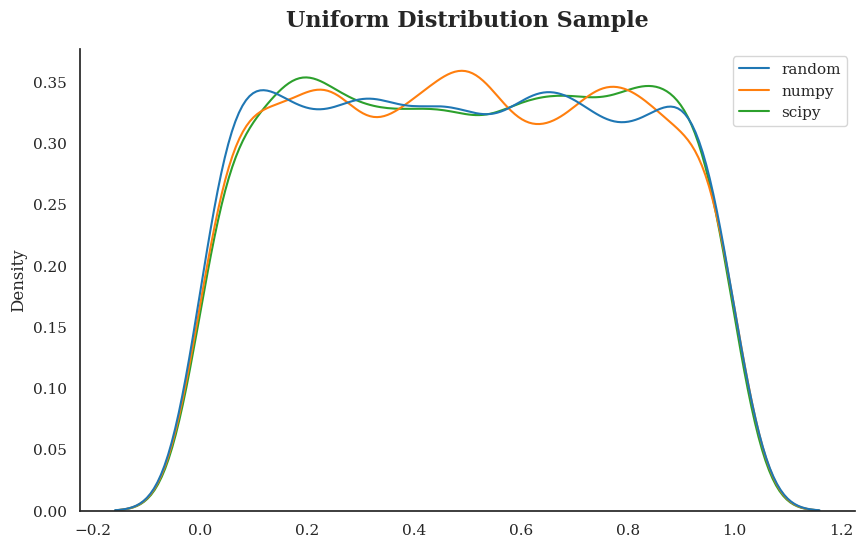

In [4]:
random_uniform = [random.uniform(a=0, b=1) for _ in range(SAMPLE_SIZE)]
numpy_uniform = numpy_gen.uniform(low=0, high=1, size=SAMPLE_SIZE)
scipy_uniform = scipy.stats.uniform.rvs(loc=0, scale=1, size=SAMPLE_SIZE, random_state=SEED)
plot_samples("Uniform", random=random_uniform, numpy=numpy_uniform, scipy=scipy_uniform)

# 3. Exponential Distribution

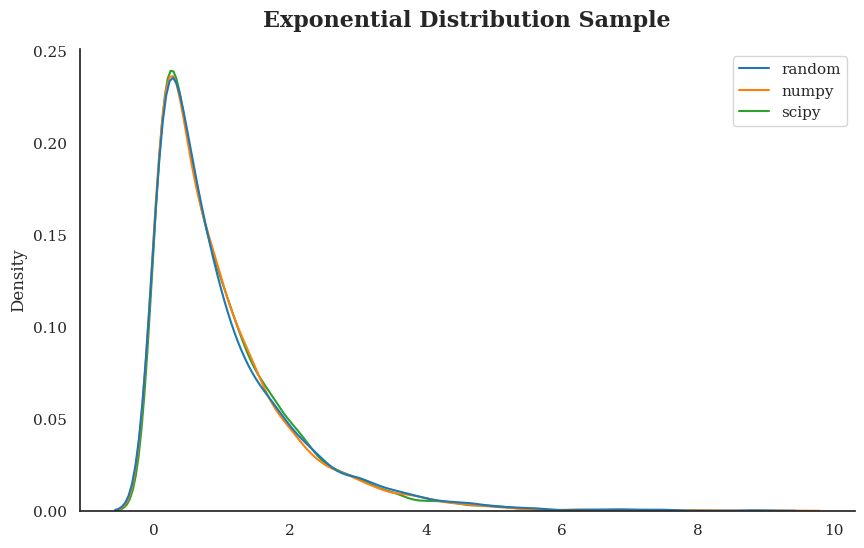

In [5]:
random_exponential = [random.expovariate(lambd=1) for _ in range(SAMPLE_SIZE)]
numpy_exponential = numpy_gen.exponential(scale=1, size=SAMPLE_SIZE)
scipy_exponential = scipy.stats.expon.rvs(scale=1, size=SAMPLE_SIZE, random_state=SEED)
plot_samples("Exponential", random=random_exponential, numpy=numpy_exponential, scipy=scipy_exponential)